In [1]:
# Import Dependencies
import os
import pandas as pd
import requests
import json
import pprint
import matplotlib.pyplot as plt
import numpy as np
from config import (aqs_api_key)
from config import (email_address)

# https://aqs.epa.gov/aqsweb/documents/data_api.html#signup for api information
pp = pprint.PrettyPrinter(indent = 4)
states_url = "https://aqs.epa.gov/data/api/list/states"
parameters_url = "https://aqs.epa.gov/data/api/list/classes"
sample_data_url = "https://aqs.epa.gov/data/api/dailyData/byState"
p1 = {"email" : email_address, "key" : aqs_api_key}

# States to be used and their ID Codes, All in top 10 for worst congestion and traffic
California = "06"
Hawaii = "15"
District_of_Columbia = "11"
New_York = "36"
Massachusetts = "25"

cali_data = []
hawaii_data = []
ny_data = []
dc_data = []
mass_data = []

In [2]:
# Create a DataFrame for California and pull carbon monoxide data from API
cali_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20200101", "edate" : "20200801", "state" : California}

# Call to url
cali_response = requests.get(sample_data_url, params = cali_params).json()
cali_data.append(cali_response)

cali_df = pd.DataFrame(cali_data[0]["Data"])
cali_df.head()


,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-07-30
1,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-07-30
2,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-07-30
3,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-07-30
4,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-07-30


In [3]:
clean_cali_df=cali_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name","event_type","validity_indicator","method_code"], axis=1)
clean_cali_df

,state_code,county_code,site_number,latitude,longitude,parameter,sample_duration,pollutant_standard,date_local,units_of_measure,...,first_max_value,first_max_hour,aqi,method,site_address,state,county,city,cbsa,date_of_last_change
0,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-01-01,Micrograms/cubic meter (LC),...,45.2,2,NaN,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
1,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2020-01-01,Micrograms/cubic meter (LC),...,12.0,23,50.0,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
2,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-01-02,Micrograms/cubic meter (LC),...,28.6,18,NaN,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
3,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2020-01-02,Micrograms/cubic meter (LC),...,15.6,23,58.0,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
4,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-01-03,Micrograms/cubic meter (LC),...,15.0,8,NaN,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,06,057,1001,39.32783,-120.184592,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2020-06-28,Micrograms/cubic meter (LC),...,6.1,23,25.0,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,"FS-10049 DONNER PASS RD, TRUCKEE",California,Nevada,Truckee,"Truckee-Grass Valley, CA",2020-07-15
7270,06,057,1001,39.32783,-120.184592,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-06-29,Micrograms/cubic meter (LC),...,15.0,7,NaN,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,"FS-10049 DONNER PASS RD, TRUCKEE",California,Nevada,Truckee,"Truckee-Grass Valley, CA",2020-07-15
7271,06,057,1001,39.32783,-120.184592,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2020-06-29,Micrograms/cubic meter (LC),...,6.4,23,27.0,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,"FS-10049 DONNER PASS RD, TRUCKEE",California,Nevada,Truckee,"Truckee-Grass Valley, CA",2020-07-15
7272,06,057,1001,39.32783,-120.184592,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-06-30,Micrograms/cubic meter (LC),...,12.0,5,NaN,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,"FS-10049 DONNER PASS RD, TRUCKEE",California,Nevada,Truckee,"Truckee-Grass Valley, CA",2020-07-15


In [4]:
#looking for the presence of null values to decide how to handle them in the cleaning progress
clean_cali_df.isnull().values.any()

True

In [68]:
# Groupby date and fix null values
#Created two ways of handling the data one to look at the aqi has the only piece to the pull. The second a more flexible set
group_cali = pd.DataFrame(clean_cali_df.groupby(['date_local', 'county'])["aqi"].mean().unstack())
group2_cali = pd.DataFrame(clean_cali_df.groupby(['date_local', 'county']).mean().unstack())

# Average out data on a per month basis
group2_cali.index = pd.to_datetime(group2_cali.index)
cali_monthly2 = group2_cali.resample('M').mean()

# Average the data with the "aqi" present
group_cali.index = pd.to_datetime(group_cali.index)
cali_monthly = group_cali.resample('M').mean()
cali_monthly.head()


Index(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
       '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
       ...
       '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
       '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30'],
      dtype='object', name='date_local', length=182)


county,Butte,Colusa,Del Norte,Glenn,Imperial,Kern,Los Angeles,Mariposa,Nevada,Orange,...,Riverside,Sacramento,San Bernardino,San Diego,San Joaquin,Stanislaus,Sutter,Trinity,Tulare,Yolo
date_local,,,,,,,,,,,,,,,,,,,,,
2020-01-31,33.419355,34.555556,30.136364,38.516129,57.129032,61.677419,46.526882,46.423077,NaN,50.620690,...,38.369355,43.629032,35.758065,38.566129,37.040000,49.4,39.933333,42.766667,63.467742,33.903226
2020-02-29,31.959770,31.620690,37.206897,34.137931,38.800000,NaN,43.477011,37.916667,NaN,40.241379,...,34.786207,43.017241,30.379310,36.977586,34.103448,44.2,41.482759,39.923077,66.000000,34.000000
2020-03-31,18.000000,NaN,26.928571,NaN,23.666667,NaN,27.086022,NaN,8.774194,19.322581,...,18.825806,20.241935,18.080645,21.232258,21.903226,31.0,NaN,24.000000,37.750000,NaN
2020-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.166667,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.750000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#The file was too much data for more of the graphes to show somehting coherant so i wanted to the top producers 
big_ones=clean_cali_df.nlargest(10, ["aqi"]) 
big_ones_group=pd.DataFrame(big_ones.groupby(['date_local', 'county'])["aqi"].mean().unstack()) 
big_ones_group.head()

county,Imperial,Los Angeles,Mariposa,Riverside,Tulare
date_local,,,,,
2020-01-01,NaN,NaN,NaN,NaN,104.0
2020-01-05,NaN,NaN,127.0,NaN,NaN
2020-01-11,124.0,NaN,NaN,NaN,NaN
2020-01-13,112.0,NaN,NaN,NaN,NaN
2020-01-15,NaN,108.0,NaN,103.0,NaN


In [38]:
cali_random=group_cali.sample(n=10, frac=None, replace=False, weights=None, random_state=None, axis=1)
print (cali_random)

county      Orange  Mariposa  Tulare  Glenn     Plumas  Yolo  Riverside  \
date_local                                                                
2020-01-01    56.0      69.0   104.0   66.0        NaN  80.0      47.00   
2020-01-02    55.0      62.0    76.0   37.0        NaN  46.0      47.75   
2020-01-03    59.0      63.0    77.0   58.0        NaN  68.0      35.50   
2020-01-04    70.0      69.0    68.0   61.0  69.000000  55.0      53.60   
2020-01-05    78.0     127.0    61.0   31.0        NaN  27.0      47.20   
...            ...       ...     ...    ...        ...   ...        ...   
2020-06-26     NaN       NaN     NaN    NaN  27.666667   NaN        NaN   
2020-06-27     NaN       NaN     NaN    NaN  26.333333   NaN        NaN   
2020-06-28     NaN       NaN     NaN    NaN  15.333333   NaN        NaN   
2020-06-29     NaN       NaN     NaN    NaN   5.666667   NaN        NaN   
2020-06-30     NaN       NaN     NaN    NaN   8.666667   NaN        NaN   

county      Sutter  Colu

In [39]:
cali_merge_df =pd.concat([big_ones_group, cali_random]) 
cali_merge_df.head()

,Imperial,Los Angeles,Mariposa,Riverside,Tulare,Orange,Glenn,Plumas,Yolo,Sutter,Colusa,San Bernardino
date_local,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-11,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-13,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-15,NaN,108.0,NaN,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


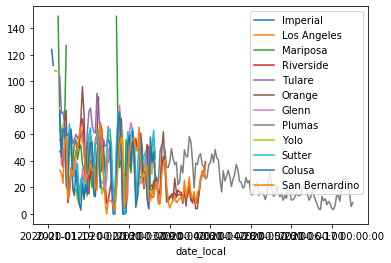

In [42]:
cali_merge_df.plot()

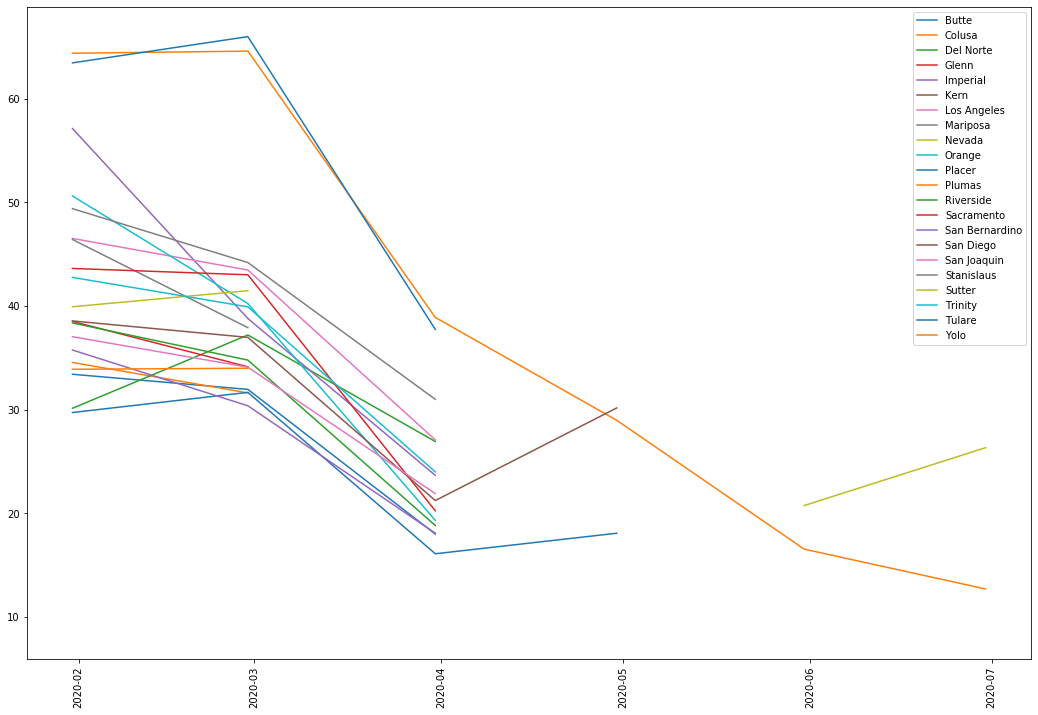

In [99]:
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = cali_monthly.index
y_values = cali_monthly
plt.plot(x_values,y_values)
ax.legend(cali_monthly)

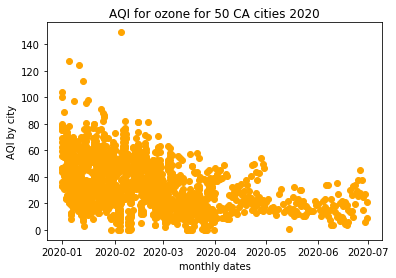

In [112]:
x_axis = group2_cali.index
x_lim = group2_cali
y_axis= group2_cali["aqi"]

plt.title("AQI for ozone for 50 CA cities 2020")
plt.xlabel("monthly dates")
plt.ylabel("AQI by city")


plt.plot_date(x_axis, y_axis, marker="o", color="orange", linewidth=1)
plt.show()

In [103]:
# States to be used and their ID Codes, All in top 10 for worst congestion and traffic
California = "06"
Hawaii = "15"
District_of_Columbia = "11"
New_York = "36"
Massachusetts = "25"

cali2_data = []

In [107]:
# Create a DataFrame for California and pull carbon monoxide data from API
cali2_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20190101", "edate" : "20190801", "state" : California}

# Call to url
cali2_response = requests.get(sample_data_url, params = cali2_params).json()
cali2_data.append(cali2_response)

cali2_df = pd.DataFrame(cali2_data[0]["Data"])
cali2_df.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-03-24
1,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-03-24
2,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-03-24
3,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-03-24
4,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-03-24


In [105]:
clean2_cali_df=cali_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name","event_type","validity_indicator","method_code"], axis=1)
clean2_cali_df

,state_code,county_code,site_number,latitude,longitude,parameter,sample_duration,pollutant_standard,date_local,units_of_measure,...,first_max_value,first_max_hour,aqi,method,site_address,state,county,city,cbsa,date_of_last_change
0,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-01-01,Micrograms/cubic meter (LC),...,45.2,2,NaN,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
1,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2020-01-01,Micrograms/cubic meter (LC),...,12.0,23,50.0,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
2,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-01-02,Micrograms/cubic meter (LC),...,28.6,18,NaN,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
3,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2020-01-02,Micrograms/cubic meter (LC),...,15.6,23,58.0,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
4,06,073,1014,32.57816,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-01-03,Micrograms/cubic meter (LC),...,15.0,8,NaN,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,06,057,1001,39.32783,-120.184592,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2020-06-28,Micrograms/cubic meter (LC),...,6.1,23,25.0,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,"FS-10049 DONNER PASS RD, TRUCKEE",California,Nevada,Truckee,"Truckee-Grass Valley, CA",2020-07-15
7270,06,057,1001,39.32783,-120.184592,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-06-29,Micrograms/cubic meter (LC),...,15.0,7,NaN,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,"FS-10049 DONNER PASS RD, TRUCKEE",California,Nevada,Truckee,"Truckee-Grass Valley, CA",2020-07-15
7271,06,057,1001,39.32783,-120.184592,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2020-06-29,Micrograms/cubic meter (LC),...,6.4,23,27.0,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,"FS-10049 DONNER PASS RD, TRUCKEE",California,Nevada,Truckee,"Truckee-Grass Valley, CA",2020-07-15
7272,06,057,1001,39.32783,-120.184592,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2020-06-30,Micrograms/cubic meter (LC),...,12.0,5,NaN,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,"FS-10049 DONNER PASS RD, TRUCKEE",California,Nevada,Truckee,"Truckee-Grass Valley, CA",2020-07-15


In [106]:
# Groupby date and fix null values
#Created two ways of handling the data one to look at the aqi has the only piece to the pull. The second a more flexible set
group_cali2 = pd.DataFrame(clean2_cali_df.groupby(['date_local', 'county'])["aqi"].mean().unstack())
group_cali2 = pd.DataFrame(clean2_cali_df.groupby(['date_local', 'county']).mean().unstack())

# Average out data on a per month basis
group2_cali.index = pd.to_datetime(group_cali2.index)
cali_monthly2 = group2_cali.resample('M').mean()

# Average the data with the "aqi" present
group_cali2.index = pd.to_datetime(group_cali2.index)
cali_monthly2 = group_cali2.resample('M').mean()
cali_monthly2.head()

latitude                                                     \
county          Butte    Colusa Del Norte     Glenn  Imperial       Kern   
date_local                                                                 
2020-01-31  39.560096  39.18919  41.75613  39.53387  32.67618  35.356615   
2020-02-29  39.570942  39.18919  41.75613  39.53387  32.67618        NaN   
2020-03-31  39.761680       NaN  41.75613       NaN  32.67618        NaN   
2020-04-30        NaN       NaN       NaN       NaN       NaN        NaN   
2020-05-31        NaN       NaN       NaN       NaN       NaN        NaN   

                                                       ...        aqi  \
county     Los Angeles   Mariposa    Nevada    Orange  ...  Riverside   
date_local                                             ...              
2020-01-31   34.127995  37.748707       NaN  33.83062  ...  38.369355   
2020-02-29   34.127995  37.748707       NaN  33.83062  ...  34.786207   
2020-03-31   34.127995        NaN  39.32783  33.83062  ...  18.825806   
2020-04-30         NaN        NaN       NaN       NaN  ...        NaN   
2020-05-31         NaN        NaN  39.32783       NaN  ...        NaN   

                                                                        \
county     Sacramento San Bernardino  San Diego San Joaquin Stanislaus   
date_local                                                               
2020-01-31  43.629032      35.758065  38.566129   37.040000       49.4   
2020-02-29  43.017241      30.379310  36.977586   34.103448       44.2   
2020-03-31  20.241935      18.080645  21.232258   21.903226       31.0   
2020-04-30        NaN            NaN  30.166667         NaN        NaN   
2020-05-31        NaN            NaN        NaN         NaN        NaN   

                                                        
county         Sutter    Trinity     Tulare       Yolo  
date_local                                              
2020-01-31  39.933333  42.766667  63.467742  33.903226  
2020-02-29  41.482759  39.923077  66.000000  34.000000  
2020-03-31        NaN  24.000000  37.750000        NaN  
2020-04-30        NaN        NaN        NaN        NaN  
2020-05-31        NaN        NaN        NaN        NaN  

[5 rows x 176 columns]

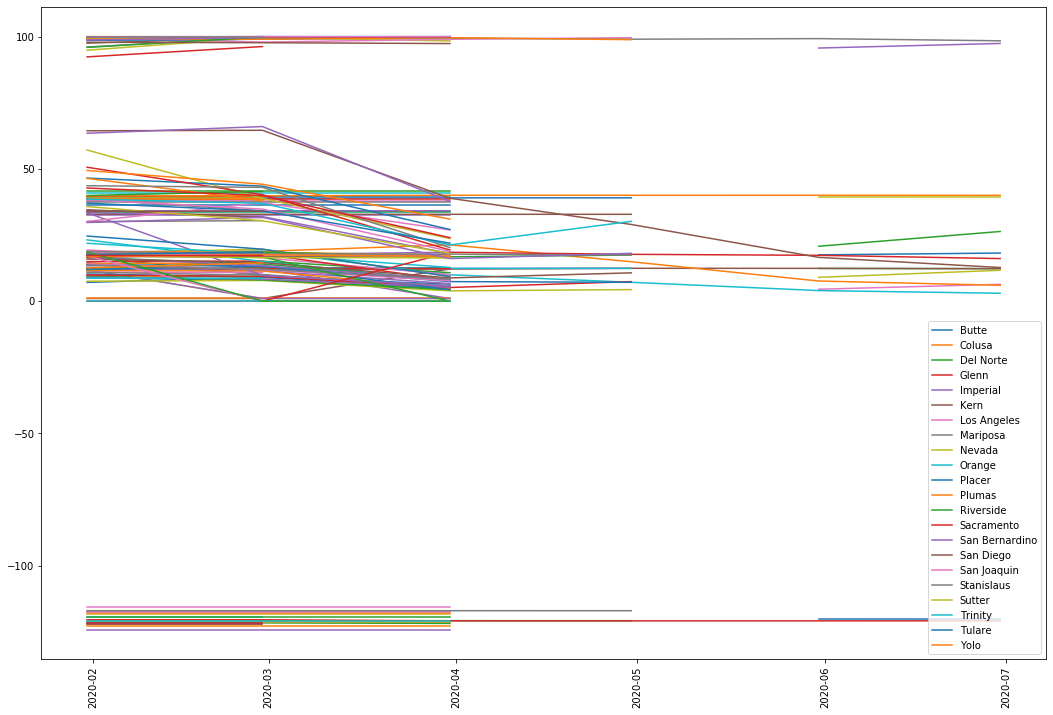

In [116]:
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = cali_monthly2.index
y_values = cali_monthly2
plt.plot(x_values,y_values)
ax.legend(cali_monthly2["aqi"])

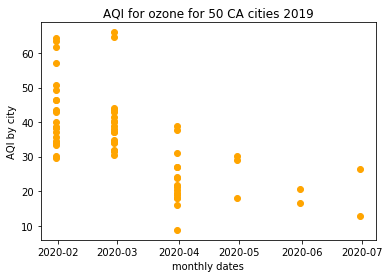

In [114]:
x_axis = cali_monthly2.index
x_lim = cali_monthly2
y_axis= cali_monthly2["aqi"]

plt.title("AQI for ozone for 50 CA cities 2019")
plt.xlabel("monthly dates")
plt.ylabel("AQI by city")


plt.plot_date(x_axis, y_axis, marker="o", color="orange", linewidth=1)
plt.show()